<a href="https://colab.research.google.com/github/Neo-glitch/computer-vision-masterclass/blob/main/AutoEncoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Auto Encoders can be used for various purposes like;**

    * Image compression
    * Dimensionality reduction
    * Image Denoising
    * Fraud Detection 

#### **Linear AutoEncoders**

In [2]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, \
                                    Input  # serve as input layer of a nn
import numpy as np
import matplotlib.pyplot as plt


##### Loading the dataset

In [3]:
from tensorflow.keras.datasets import mnist


(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train.shape, y_train.shape

11501568/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,))

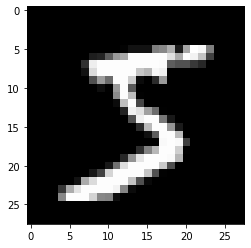

In [4]:
plt.imshow(x_train[0], cmap ="gray")

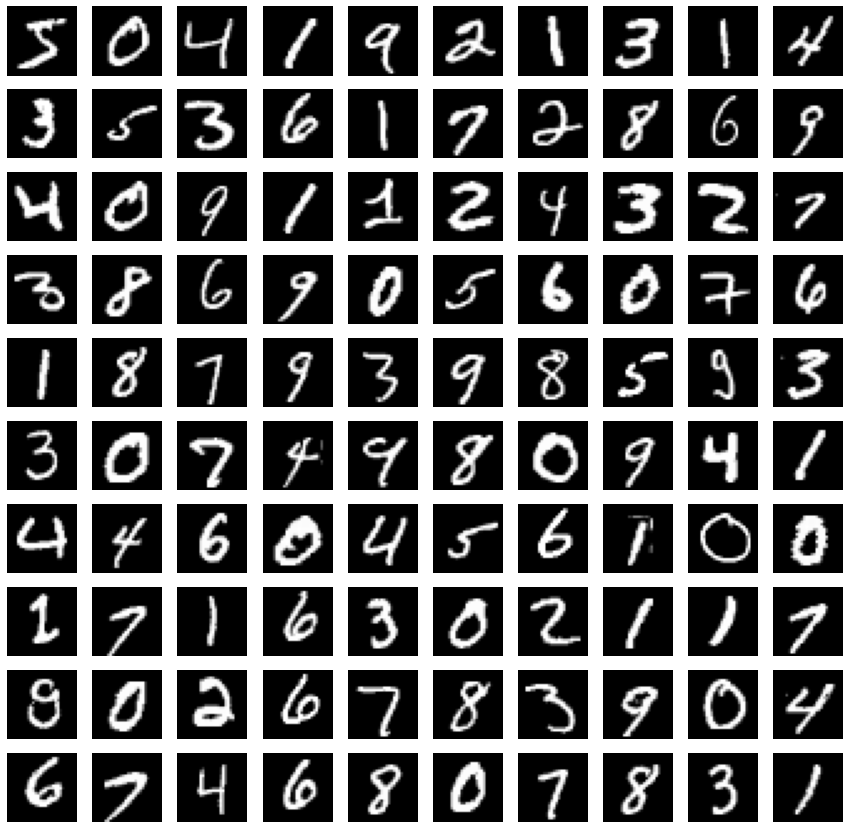

In [5]:
width = 10
height = 10

fig, axs = plt.subplots(height, width, figsize = (15, 15))
axs = axs.flatten() # 10 x 10 to 100 

for i in np.arange(0, width * height):
  axs[i].imshow(x_train[i], cmap ="gray")
  axs[i].axis("off")

In [6]:
# scale pixel
x_train = x_train / 255.

x_test = x_test / 255.

#### Building and Training Linear AutoEncoder

In [7]:
# since using nn to create AutoEncoder working with images, we need to flatten image from 28 * 28 to 784

x_train = x_train.reshape(x_train.shape[0],-1)
x_test = x_test.reshape(x_test.shape[0], -1)

In [8]:
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

In [9]:
# structure will be 784 - 128 - 64 - 32 - 64 - 128 - 784

autoencoder = Sequential()

# Encode
autoencoder.add(Input(shape = (784,)))
autoencoder.add(Dense(128, activation = "relu"))
autoencoder.add(Dense(64, activation ="relu"))
autoencoder.add(Dense(32, activation ="relu"))   # Encoded image in this layer


# Decode
autoencoder.add(Dense(64, activation ="relu"))
autoencoder.add(Dense(128, activation = "relu"))
autoencoder.add(Dense(784, activation = "sigmoid"))

autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               101136    
                                                                 
Total params: 222,384
Trainable params: 222,384
Non-trai

In [10]:
autoencoder.compile(optimizer = "Adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [11]:
# N.B no need to take into consideration accuracy score for auto encoders
autoencoder.fit(x_train, x_train, epochs = 50)

Epoch 1/50
1875/1875 [==============================] - 11s 4ms/step - loss: 0.1563 - accuracy: 0.0108
Epoch 2/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1119 - accuracy: 0.0131
Epoch 3/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1031 - accuracy: 0.0125
Epoch 4/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0986 - accuracy: 0.0138
Epoch 5/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0951 - accuracy: 0.0132
Epoch 6/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0925 - accuracy: 0.0127
Epoch 7/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0905 - accuracy: 0.0138
Epoch 8/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0892 - accuracy: 0.0139
Epoch 9/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0882 - accuracy: 0.0140
Epoch 10/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.08

#### Encoding and Decoding Images

In [12]:
# 784 - 128 - 64 - 32 (Encoding)
encoder = Model(inputs = autoencoder.input, 
                outputs = autoencoder.get_layer("dense_2").output  # "dense_2 is the layer name having 32 neurons"
                )

encoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
Total params: 110,816
Trainable params: 110,816
Non-trainable params: 0
_________________________________________________________________


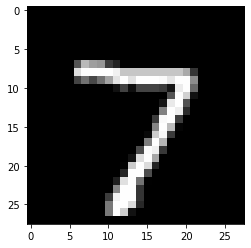

In [13]:
plt.imshow(x_test[0].reshape(28, 28), cmap="gray")

In [14]:
# encodes the image
encoded_image = encoder.predict(x_test[0].reshape(1, -1))

Encoded image shape is:  (1, 32)


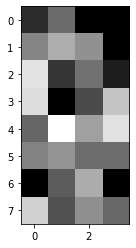

In [15]:
print("Encoded image shape is: " , encoded_image.shape)

plt.imshow(encoded_image.reshape(8, 4), cmap = "gray")

In [16]:
# Decoder 32 - 64 - 128 - 784
input_layer_decoder = Input(shape = (32,))
decoder_layer1= autoencoder.layers[3]  # get layer by index
decoder_layer2 = autoencoder.layers[4]
decoder_layer3 = autoencoder.layers[5]

decoder = Model(inputs = input_layer_decoder,
                # one line way of connecting layers
                outputs = decoder_layer3(decoder_layer2(decoder_layer1(input_layer_decoder))))

decoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32)]              0         
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               101136    
                                                                 
Total params: 111,568
Trainable params: 111,568
Non-trainable params: 0
_________________________________________________________________


In [17]:
# does image decoding
decoded_image = decoder.predict(encoded_image)

decoded_image.shape

(1, 784)

(-0.5, 27.5, 27.5, -0.5)

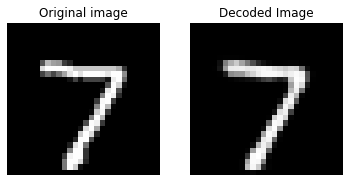

In [18]:
fig, axs = plt.subplots(1, 2)

axs = axs.ravel()

axs[0].imshow(x_test[0].reshape(28, 28), cmap ="gray")
axs[0].set_title("Original image")
axs[0].axis("off")

axs[1].imshow(decoded_image.reshape(28, 28), cmap ="gray")
axs[1].set_title("Decoded Image")
axs[1].axis("off")

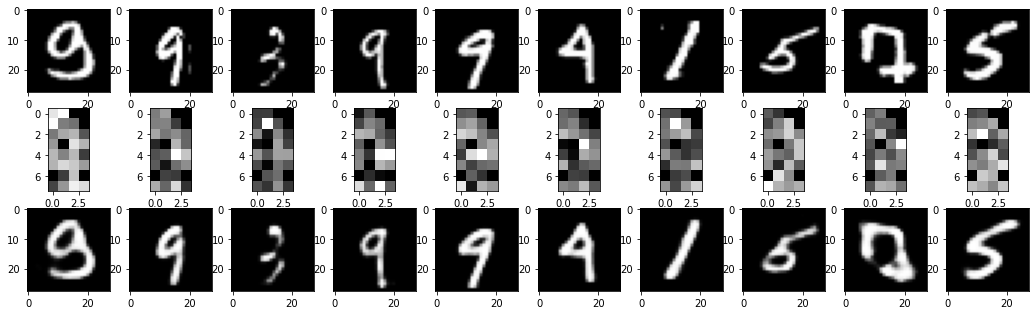

In [19]:
# Encoding and Decoding Image
n_images = 10

# index of x_test to work with
test_images= np.random.randint(0, x_test.shape[0] - 1, size = n_images)
plt.figure(figsize = (18, 18))

for i, image_index in enumerate(test_images):

  # enables having new axis for each item based on i+ 1 value 
  ax = plt.subplot(10, 10, i + 1)
  plt.imshow(x_test[image_index].reshape(28, 28), cmap ="gray")
  plt.xticks()
  plt.yticks()

  #Coded images
  ax = plt.subplot(10, 10, i + 1 + n_images)  # n_images value was just added to avoid errors
  encoded_image = encoder.predict(x_test[image_index].reshape(1, -1))
  plt.imshow(encoded_image.reshape(8, 4), cmap ="gray")
  plt.xticks()
  plt.yticks()

  # Decoded images
  ax = plt.subplot(10, 10, i + 1 + n_images * 2)  
  decoded_image = decoder.predict(encoded_image)
  plt.imshow(decoded_image.reshape(28, 28), cmap ="gray")
  plt.xticks()
  plt.yticks()
  

### **Convolutional AutoEncoders**

In [21]:
# upsampling is the reverse of MaxPooling and Reshape can be used as reverse of flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, \
 UpSampling2D, Reshape, Flatten

In [22]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


x_train.shape, x_test.shape

4431872/4422102 [==============================] - 0s 0us/step


((60000, 28, 28), (10000, 28, 28))

### data viz

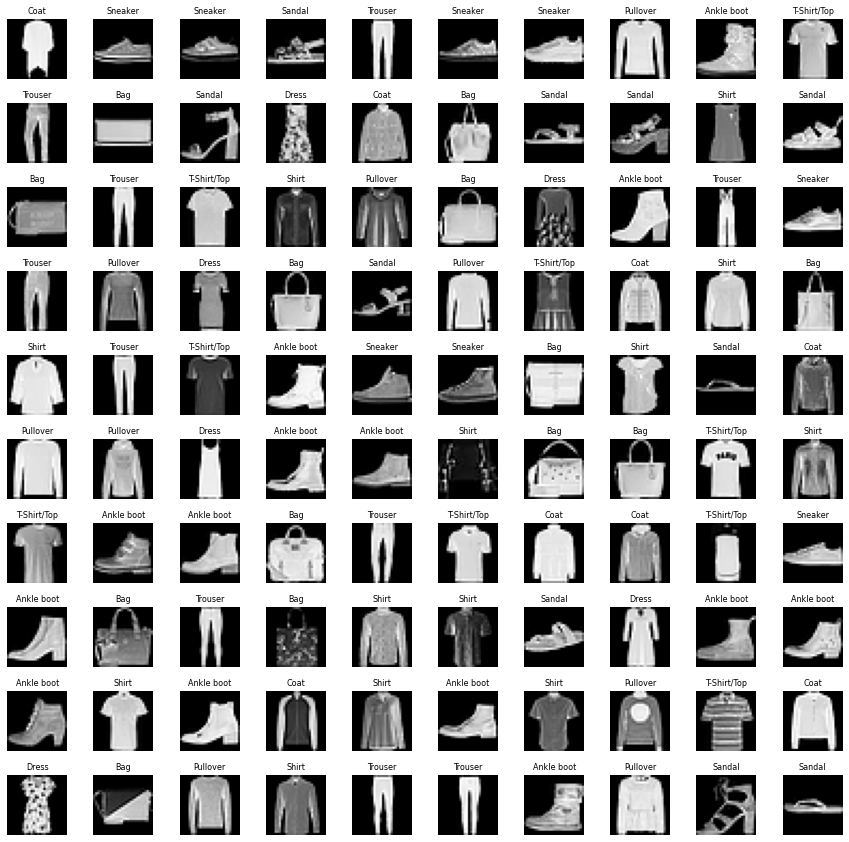

In [27]:
classes = ["T-Shirt/Top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
width = 10
height = 10

_, axes = plt.subplots(height, width, figsize = (15, 15))
axes = axes.ravel()

for i in np.arange(0, width * height):
  index = np.random.randint(0, x_train.shape[0])

  axes[i].imshow(x_train[index], cmap="gray")
  axes[i].set_title(classes[y_train[index]], fontSize = 8)
  axes[i].axis("off")

plt.subplots_adjust(hspace = 0.4, wspace = 0.4)

#### Image Preprocessing

In [28]:
x_train = x_train / 255.
x_test = x_test / 255.

x_train = x_train.reshape(len(x_train), 28, 28, 1)
x_test = x_test.reshape(len(x_test), 28, 28, 1)

x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

### Model Building and Training

In [45]:
autoencoder = Sequential()


# Encoder
autoencoder.add(Conv2D(filters = 16, kernel_size = (3,3), activation ="relu", padding = "valid", input_shape = x_train.shape[1:]))
autoencoder.add(MaxPooling2D(pool_size = (2,2)))

autoencoder.add(Conv2D(filters = 8, kernel_size=(3,3), activation ="relu", padding = "same"))
autoencoder.add(MaxPooling2D(pool_size = (2,2), padding = "same"))

autoencoder.add(Conv2D(filters = 8, kernel_size=(3,3), activation ="relu", strides = (2,2), padding ="same"))

autoencoder.add(Flatten())

# autoencoder.summary()

# Decoder
autoencoder.add(Reshape((4, 4, 8)))

autoencoder.add(Conv2D(filters = 8, kernel_size = (3,3), activation ="relu", padding ="same"))
autoencoder.add(UpSampling2D(size = (2,2)))  # opposite of maxPooling

autoencoder.add(Conv2D(filters = 8, kernel_size = (3,3), activation ="relu", padding ="same"))
autoencoder.add(UpSampling2D(size = (2,2)))  

autoencoder.add(Conv2D(filters = 16, kernel_size = (3,3), activation ="relu"))
autoencoder.add(UpSampling2D(size = (2,2))) 

# output (sigmoid since each pixel is what is being predicted)
autoencoder.add(Conv2D(filters = 1, kernel_size = (3,3), activation ="sigmoid", padding ="same"))  

autoencoder.summary()



Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_54 (Conv2D)          (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 13, 13, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_55 (Conv2D)          (None, 13, 13, 8)         1160      
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 7, 7, 8)          0         
 g2D)                                                            
                                                                 
 conv2d_56 (Conv2D)          (None, 4, 4, 8)           584       
                                                                 
 flatten_10 (Flatten)        (None, 128)             

In [ ]:
"""
Tip to calc output of a layer:

Output = (Input - Filter_Size + 1) / Stride      # when padding is set to valid alone

e.g Input = (28, 28, 1), Filter_size = 3, Stride = 1, filters= 16

    so output = (28 - 3 + 1) / 1 = 26 -> 26, 26, 16
"""


In [46]:
autoencoder.compile(optimizer ="Adam", loss="binary_crossentropy", metrics = ["accuracy"])

autoencoder.fit(x_train, x_train, epochs = 50)

Epoch 1/50
1875/1875 [==============================] - 17s 4ms/step - loss: 0.3166 - accuracy: 0.5035
Epoch 2/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2903 - accuracy: 0.5062
Epoch 3/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2861 - accuracy: 0.5068
Epoch 4/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2837 - accuracy: 0.5071
Epoch 5/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2817 - accuracy: 0.5074
Epoch 6/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2801 - accuracy: 0.5076
Epoch 7/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2788 - accuracy: 0.5078
Epoch 8/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2777 - accuracy: 0.5079
Epoch 9/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2768 - accuracy: 0.5080
Epoch 10/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.27

### Encoding and Decoding Test Images

In [47]:
autoencoder.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_54 (Conv2D)          (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 13, 13, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_55 (Conv2D)          (None, 13, 13, 8)         1160      
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 7, 7, 8)          0         
 g2D)                                                            
                                                                 
 conv2d_56 (Conv2D)          (None, 4, 4, 8)           584       
                                                                 
 flatten_10 (Flatten)        (None, 128)             

In [50]:
encoder = Model(inputs = autoencoder.input, outputs = autoencoder.layers[5].output)
encoder.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_54_input (InputLayer  [(None, 28, 28, 1)]      0         
 )                                                               
                                                                 
 conv2d_54 (Conv2D)          (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 13, 13, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_55 (Conv2D)          (None, 13, 13, 8)         1160      
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 7, 7, 8)          0         
 g2D)                                                            
                                                           

In [52]:
encoded_test_images = encoder.predict(x_test)

# encodes images
encoded_test_images.shape

(10000, 128)

In [53]:
# instead of creating a new decoder model, just encode and decode the image
decoded_test_images = autoencoder.predict(x_test)

decoded_test_images.shape

(10000, 28, 28, 1)

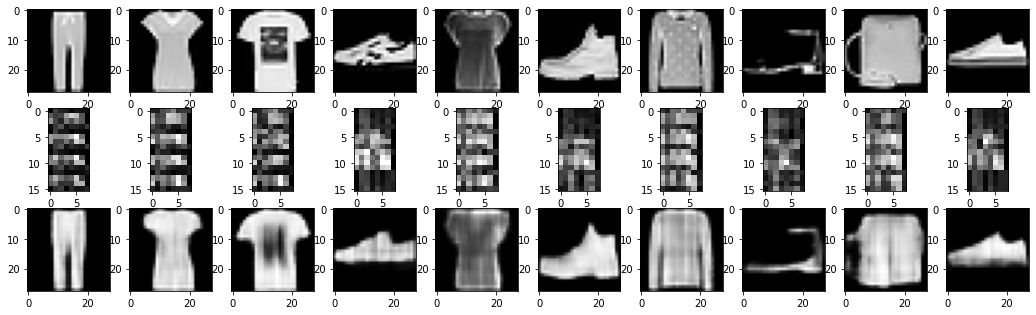

In [58]:
n_images = 10
test_images = np.random.randint(0, x_test.shape[0], size = n_images)
plt.figure(figsize = (18, 18))

for i, image_index in enumerate(test_images):

  # Orig images
  ax = plt.subplot(10, 10, i + 1)
  plt.imshow(x_test[image_index].reshape(28, 28), cmap ="gray")
  plt.xticks()
  plt.yticks()

  # Encoded Images
  ax = plt.subplot(10, 10, i + 1 +  n_images)
  plt.imshow(encoded_test_images[image_index].reshape(16, 8), cmap ="gray")
  plt.xticks()
  plt.yticks()

  # Decoded Images
  ax = plt.subplot(10, 10, i + 1 + n_images * 2)
  plt.imshow(decoded_test_images[image_index].reshape(28, 28), cmap ="gray")
  plt.xticks()
  plt.yticks()

